- - - -
# LED Electrical Characteristics Dependence on LED Color

- - - -

Troy Messina @ Berea College

- - - -

**1) Load Current-Voltage (I-V) Data**    
**2) Plot Data**  
**3) Curve Fitting**  

- - - -

This is a smattering of scripts to work with data collected from ELVISmx and myDAQ. We previously analyzed an LED to understand curve fitting and finding the forward voltage that corresponds to turning on. Now we will look at how that forward voltage depends on the color of the LED.

In [1]:
# import modules
import pandas as pd
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

We need to be a bit more careful about loading data into Jupyter because we need to load four different data sets for the four LEDS red, yellow, green, and blue with three different setups ($R = [10 000, 1000, 100]~\Omega$). Place your Excel file in the same directory where you save this Jupyter file.

We will use a library called Pandas to load Excel data imported as ``pd``. The code below creates what is known as a Pandas dataframe that stores the Excel data. The command to read Excel files is ``pd.read_excel``. It takes arguments that are the filename, the sheet name, index_col looks for a column of row names. na_values tells what to do with "not a number" values. The command will automatically look for column names in your file and use those to name your data columns.

In [2]:
#We'll use pandas to load an Excel file. Pandas is very smart at this.
red_10000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'red_10000', index_col=None, na_values=['NA'])
red_1000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'red_1000', index_col=None, na_values=['NA'])
red_100 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'red_100', index_col=None, na_values=['NA'])

yellow_10000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'yellow_10000', index_col=None, na_values=['NA'])
yellow_1000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'yellow_1000', index_col=None, na_values=['NA'])
yellow_100 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'yellow_100', index_col=None, na_values=['NA'])

green_10000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'green_10000', index_col=None, na_values=['NA'])
green_1000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'green_1000', index_col=None, na_values=['NA'])
green_100 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'green_100', index_col=None, na_values=['NA'])

blue_10000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'blue_10000', index_col=None, na_values=['NA'])
blue_1000 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'blue_1000', index_col=None, na_values=['NA'])
blue_100 = pd.read_excel('LED_IV_Data_TCM2.xlsx', 'blue_100', index_col=None, na_values=['NA'])

According to Ohm's Law, the current through our voltage divider circuit should be

$$I = \frac{V_{in}-V_{LED}}{R}$$

Let's create a current column in each dataframe. Then, we'll plot the data in a couple of different ways.

In [3]:
#df['current'] = (df['Vin']-df['Vled'])/R
red_10000['current'] = (red_10000['Vin']-red_10000['Vled'])/10000 #Calculate the current as derived above and put it in the dataframe created by Pandas.
red_1000['current'] = (red_1000['Vin']-red_1000['Vled'])/1000
red_100['current'] = (red_100['Vin']-red_100['Vled'])/100

yellow_10000['current'] = (yellow_10000['Vin']-yellow_10000['Vled'])/10000
yellow_1000['current'] = (yellow_1000['Vin']-yellow_1000['Vled'])/1000
yellow_100['current'] = (yellow_100['Vin']-yellow_100['Vled'])/100

green_10000['current'] = (green_10000['Vin']-green_10000['Vled'])/10000
green_1000['current'] = (green_1000['Vin']-green_1000['Vled'])/1000
green_100['current'] = (green_100['Vin']-green_100['Vled'])/100

blue_10000['current'] = (blue_10000['Vin']-blue_10000['Vled'])/10000
blue_1000['current'] = (blue_1000['Vin']-blue_1000['Vled'])/1000
blue_100['current'] = (blue_100['Vin']-blue_100['Vled'])/100

Let's plot the colors individually first.

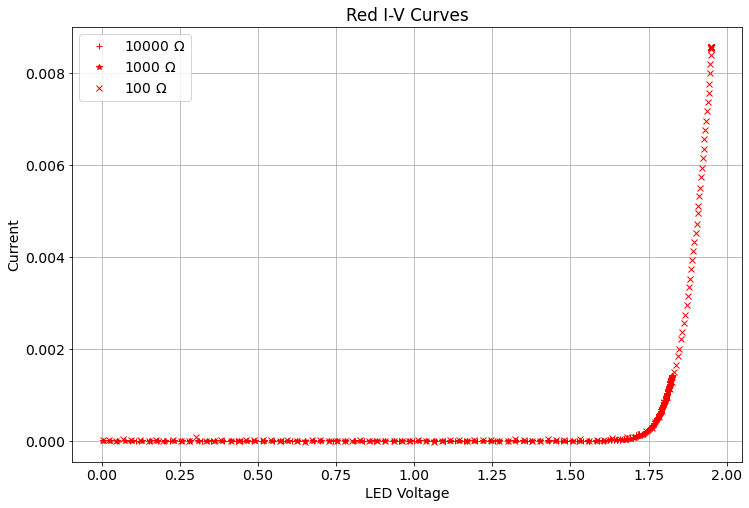

In [18]:
plt.plot(red_10000['Vled'], red_10000['current'], 'r+', label='$10000~\Omega$')
plt.plot(red_1000['Vled'], red_1000['current'], 'r*', label='$1000~\Omega$')
plt.plot(red_100['Vled'], red_100['current'], 'rx', label='$100~\Omega$')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('Red I-V Curves')
#plt.xlim(1.5, 2.0)
#plt.ylim(0.0, 0.002)
plt.legend(loc=0)
plt.grid(True)
plt.show()

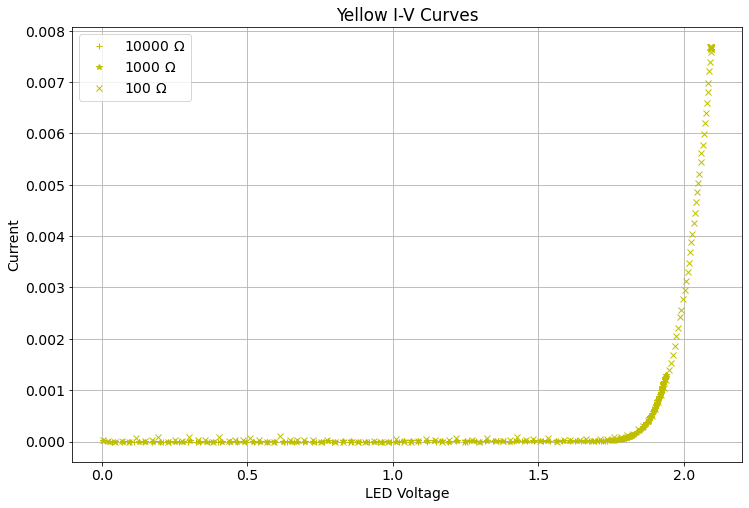

In [19]:
plt.plot(yellow_10000['Vled'], yellow_10000['current'], 'y+', label='$10000~\Omega$')
plt.plot(yellow_1000['Vled'], yellow_1000['current'], 'y*', label='$1000~\Omega$')
plt.plot(yellow_100['Vled'], yellow_100['current'], 'yx', label='$100~\Omega$')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('Yellow I-V Curves')
plt.legend(loc=0)
plt.grid(True)
plt.show()

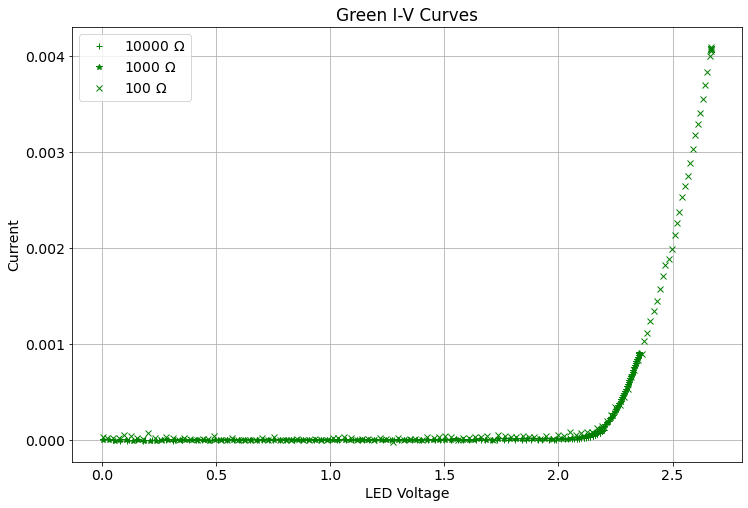

In [20]:
plt.plot(green_10000['Vled'], green_10000['current'], 'g+', label='$10000~\Omega$')
plt.plot(green_1000['Vled'], green_1000['current'], 'g*', label='$1000~\Omega$')
plt.plot(green_100['Vled'], green_100['current'], 'gx', label='$100~\Omega$')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('Green I-V Curves')
plt.legend(loc=0)
plt.grid(True)
plt.show()

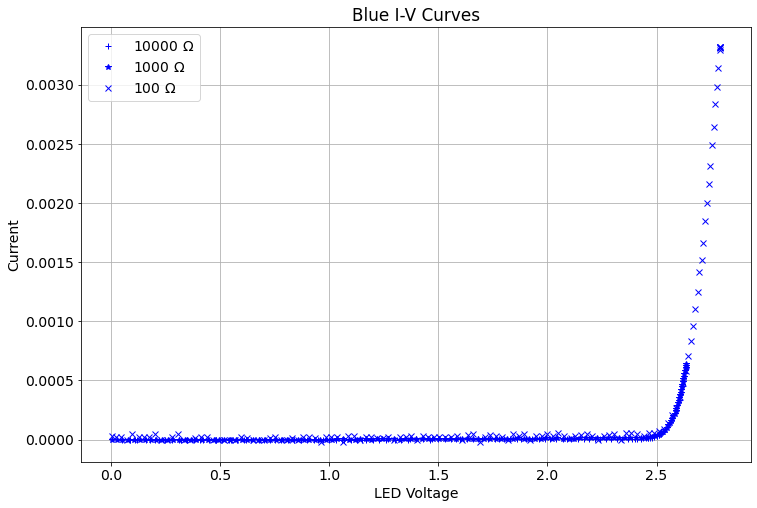

In [26]:
plt.plot(blue_10000['Vled'], blue_10000['current'], 'b+', label='$10000~\Omega$')
plt.plot(blue_1000['Vled'], blue_1000['current'], 'b*', label='$1000~\Omega$')
plt.plot(blue_100['Vled'], blue_100['current'], 'bx', label='$100~\Omega$')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('Blue I-V Curves')
#plt.xlim(2,2.8)
plt.legend(loc=0)
plt.grid(True)
plt.show()

We can see that the $R=100\Omega$ data gives a curve that extends the highest. We should expect that the current through this circuit would be greater since it has less resistance. Let's plot the different color LEDs on a single plot for $R=100\Omega$.

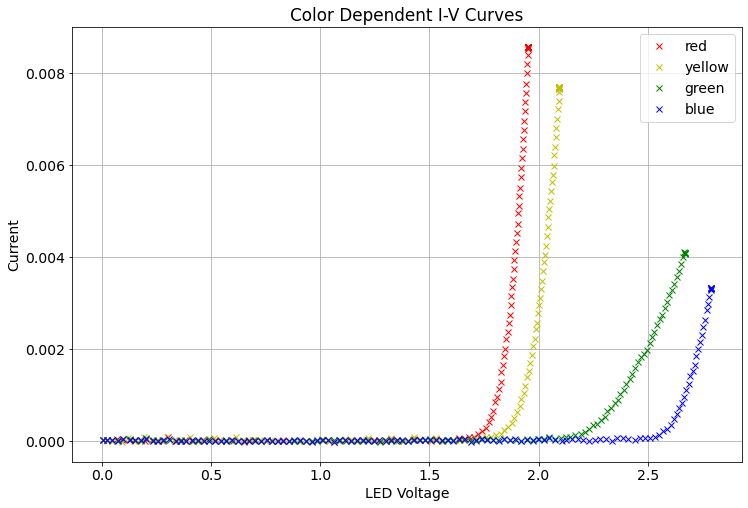

In [22]:
plt.plot(red_100['Vled'], red_100['current'], 'rx', label='red')
plt.plot(yellow_100['Vled'], yellow_100['current'], 'yx', label='yellow')
plt.plot(green_100['Vled'], green_100['current'], 'gx', label='green')
plt.plot(blue_100['Vled'], blue_100['current'], 'bx', label='blue')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('Color Dependent I-V Curves')
plt.legend(loc=0)
plt.grid(True)
plt.show()

We need to propagate the uncertainty in the current before we attempt to fit the data for the turn-on voltage. The uncertainty in the current is propagated as

$$\Delta I = \sqrt{\left|\frac{\partial I}{\partial V_{in}}\Delta V_{in}\right|^2+\left|\frac{\partial I}{\partial V_{led}}\Delta V_{led}\right|^2+\left|\frac{\partial I}{\partial R}\Delta R\right|^2}$$

We will assume the uncertainty in the voltages comes from the digitization, which is dividing the 3.3 Volts into 1024 increments $\Delta V = 3.3/1024 = 0.003~{\rm V}$. The uncertainty in the resistor is based on the fourth color band. Silver is 10% and gold is 5%. My resistor was $R=100\pm 10 \Omega$. 

In [104]:
R=100
dR=10
dV=0.003

red_100['current_unc'] = np.sqrt((1/R*dV)**2+(1/R*dV)**2+((red_100['Vin']-red_100['Vled'])/(R)**2*dR)**2)
yellow_100['current_unc'] = np.sqrt((1/R*dV)**2+(1/R*dV)**2+((yellow_100['Vin']-yellow_100['Vled'])/(R)**2*dR)**2)
green_100['current_unc'] = np.sqrt((1/R*dV)**2+(1/R*dV)**2+((green_100['Vin']-green_100['Vled'])/(R)**2*dR)**2)
blue_100['current_unc'] = np.sqrt((1/R*dV)**2+(1/R*dV)**2+((blue_100['Vin']-blue_100['Vled'])/(R)**2*dR)**2)

We need to find the turn-on voltage. To do this we will fit a line to the steeply increasing current vs. voltage. With that line we can find the x-intercept, and use that as the turn-on voltage. Unfortunately, the fitting routine cannot be applied to only that range of the data. To do this fitting we want to create arrays with only the part of the data we want to fit. For example, the turn-on seems to be around 2.6 Volts for the blue LED, we will use the data above 2.6 Volts to avoid the curving portion that is not linear. It may take some testing to find the best range of data that includes the most data points.

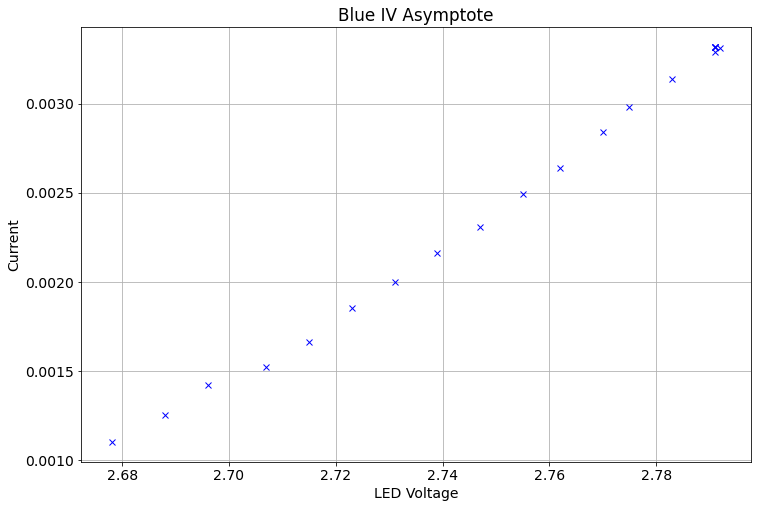

In [105]:
#define an array that is only the asymptotic portion
blue_100_asymptote = blue_100.loc[blue_100['Vled'] >2.675]

#Plot it to check that it is linear
plt.plot(blue_100_asymptote['Vled'], blue_100_asymptote['current'], 'bx')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('Blue IV Asymptote')
plt.grid(True)
plt.show()

Now, we need to define a curve fitting function, which is a straight line.

In [106]:
# curve_fit optization
def f_line(x, a, b):
    return a*x + b

#initial guesses for slope and intercept
a = 1e-3
b = -1e-2

Do the linear curve fitting.

In [107]:
blue_100_params, blue_100_pcov = curve_fit(f_line, blue_100_asymptote['Vled'], blue_100_asymptote['current'], (a,b), sigma=blue_100_asymptote['current_unc'], absolute_sigma=True)

#print('values of the fitting parameters')
print(blue_100_params, blue_100_pcov)

[ 0.01951903 -0.05124041] [[ 1.51840077e-06 -4.13467389e-06]
 [-4.13467389e-06  1.12610964e-05]]


The parameters that are printed show that the slope is $a=0.01951903$ and the intercept is $b=-0.05124041$. The uncertainty in these parameters is given by the diagonal of the covariant matrix ``blue_100_pcov``. So, we can write that the blue LED has an asymptote described by

$$I = 1.95\times 10^{-2}\pm 1.52\times 10^{-6} V_{LED} - 5.12\times 10^{-2}\pm 1.13\times 10^{-5}$$

The uncertainties are quite small. Now, let's plot the fit on the data and show the error bars of the data.

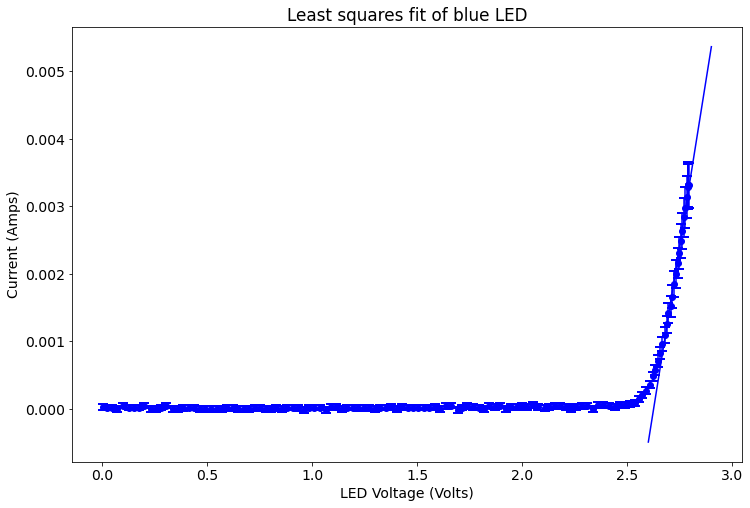

In [59]:
#Make some x-values for creating a fit trendline
xx_blue_100 = linspace(2.6, 2.9, 200)

#Plot the data with error bars
plt.errorbar(blue_100['Vled'], blue_100['current'], fmt='bo', yerr=blue_100['current_unc'], capsize=5, capthick=2)
plt.plot(xx_blue_100, f_line(xx, *blue_100_params), 'b')
plt.title(r'Least squares fit of blue LED')
#plt.xlim([0,3.0])
#plt.ylim([-1e-5,0.00008])
plt.xlabel('LED Voltage (Volts)')
plt.ylabel('Current (Amps)')
plt.show()

When $y=0$, we get

$$0~=~0.01951903~V_{LED}~-~0.05124041$$.

Let's use python to calculate $V_{LED}$ at this axis crossing, but let's use the output from the fitting rather than typing out values. Since the intercept is negative, we need to take the negative of it or take the absolute value of the parameter ratio.

In [52]:
print(np.absolute(blue_100_params[1]/blue_100_params[0]))

2.6251512102613352


And now, we'll use the speed of light and Planck's constant to calculate the wavelength of the LED.

$$\lambda = hc/eV_{turn-on}$$

In [54]:
#Planck's constant
h = 6.626e-34 #J-s
#speed of light
c = 3e8 #m/s
#eV to Joules
e = 1.602e-19

#define blue turn-on Voltage
blue_100_turnon = np.absolute(blue_100_params[1]/blue_100_params[0])
#define the wavelength from Planck's definition
blue_100_lambda = h*c/(e*blue_100_turnon)
print(blue_100_lambda*1e9, "nm")

472.6676182260482 nm


Without explanation, I will do the analysis for all colors next. The main things to look out for are
* defining things with unique names you can use later
* keeping track of the unique names you've created
* fitting only the linear region, which will be different for different colors and different resistors BOTH

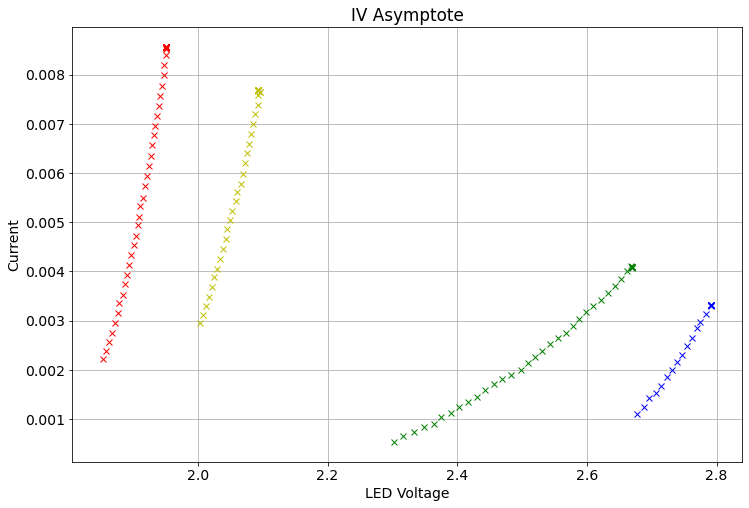

In [64]:
#define an array that is only the asymptotic portion
red_100_asymptote = red_100.loc[red_100['Vled'] >1.85]
yellow_100_asymptote = yellow_100.loc[yellow_100['Vled'] >2.0]
green_100_asymptote = green_100.loc[green_100['Vled'] >2.3]

#Plot it to check that it is linear
plt.plot(red_100_asymptote['Vled'], red_100_asymptote['current'], 'rx')
plt.plot(yellow_100_asymptote['Vled'], yellow_100_asymptote['current'], 'yx')
plt.plot(green_100_asymptote['Vled'], green_100_asymptote['current'], 'gx')
plt.plot(blue_100_asymptote['Vled'], blue_100_asymptote['current'], 'bx')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('IV Asymptote')
plt.grid(True)
plt.show()

In [73]:
red_100_params, red_100_pcov = curve_fit(f_line, red_100_asymptote['Vled'], red_100_asymptote['current'], (a,b), sigma=red_100_asymptote['current_unc'], absolute_sigma=True)
yellow_100_params, yellow_100_pcov = curve_fit(f_line, yellow_100_asymptote['Vled'], yellow_100_asymptote['current'], (a,b), sigma=yellow_100_asymptote['current_unc'], absolute_sigma=True)
green_100_params, green_100_pcov = curve_fit(f_line, green_100_asymptote['Vled'], green_100_asymptote['current'], (a,b), sigma=green_100_asymptote['current_unc'], absolute_sigma=True)

#print('values of the fitting parameters')
print("red", red_100_params, red_100_pcov)
print("yellow", yellow_100_params, yellow_100_pcov)
print("green", green_100_params, green_100_pcov)

red [ 0.06408467 -0.11693106] [[ 4.80396912e-06 -9.09156879e-06]
 [-9.09156879e-06  1.72108902e-05]]
yellow [ 0.05255672 -0.10253259] [[ 7.24569276e-06 -1.48231665e-05]
 [-1.48231665e-05  3.03324221e-05]]
green [ 0.00899686 -0.02028671] [[ 7.36826198e-08 -1.76690740e-07]
 [-1.76690740e-07  4.24415575e-07]]


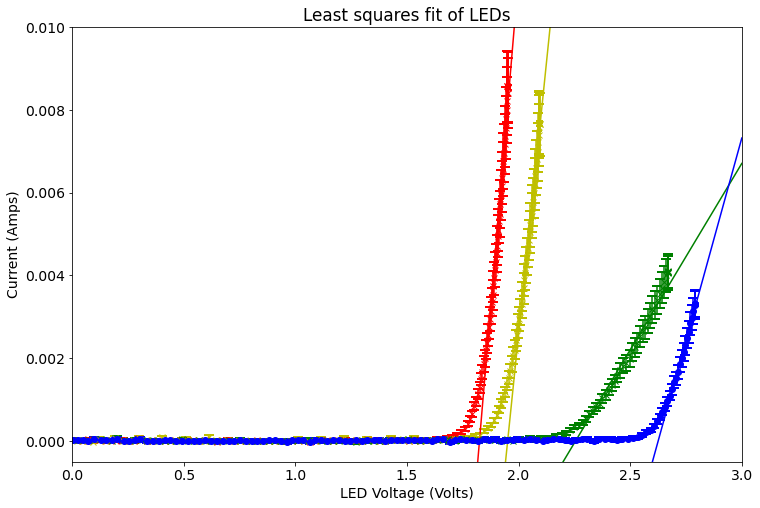

In [72]:
#Make some x-values for creating a fit trendline
xx = linspace(0, 3, 500) #use one set of x-values for all

#Plot the data with error bars
plt.errorbar(red_100['Vled'], red_100['current'], fmt='rx', yerr=red_100['current_unc'], capsize=5, capthick=2)
plt.errorbar(yellow_100['Vled'], yellow_100['current'], fmt='yx', yerr=yellow_100['current_unc'], capsize=5, capthick=2)
plt.errorbar(green_100['Vled'], green_100['current'], fmt='gx', yerr=green_100['current_unc'], capsize=5, capthick=2)
plt.errorbar(blue_100['Vled'], blue_100['current'], fmt='bo', yerr=blue_100['current_unc'], capsize=5, capthick=2)
#plot the linear trendlines
plt.plot(xx, f_line(xx, *red_100_params), 'r')
plt.plot(xx, f_line(xx, *yellow_100_params), 'y')
plt.plot(xx, f_line(xx, *green_100_params), 'g')
plt.plot(xx, f_line(xx, *blue_100_params), 'b')
plt.title(r'Least squares fit of LEDs')
plt.xlim([0,3.0])
plt.ylim([-5e-4,0.01])
plt.xlabel('LED Voltage (Volts)')
plt.ylabel('Current (Amps)')
plt.show()

In [109]:
#define turn-on Voltage
red_100_turnon = np.absolute(red_100_params[1]/red_100_params[0])
yellow_100_turnon = np.absolute(yellow_100_params[1]/yellow_100_params[0])
green_100_turnon = np.absolute(green_100_params[1]/green_100_params[0])

#define the wavelength from Planck's definition
red_100_lambda = h*c/(e*red_100_turnon)
yellow_100_lambda = h*c/(e*yellow_100_turnon)
green_100_lambda = h*c/(e*green_100_turnon)

#define uncertainties in wavelength voltage based on taking the ratio
red_100_lambda_unc = h*c/(e*red_100_turnon**2)*dV #assume the turn on voltage has dV uncert
yellow_100_lambda_unc = h*c/(e*yellow_100_turnon**2)*dV
green_100_lambda_unc = h*c/(e*green_100_turnon**2)*dV
blue_100_lambda_unc = h*c/(e*blue_100_turnon**2)*dV

#print the wavelengths
print("red: %3.1f, +/- %3.1f, nm" % (red_100_lambda*1e9, red_100_lambda_unc*1e9))
print("yellow: %3.1f, +/- %3.1f, nm" % (yellow_100_lambda*1e9, yellow_100_lambda_unc*1e9))
print("green: %3.1f, +/- %3.1f, nm" % (green_100_lambda*1e9, green_100_lambda_unc*1e9))
print("blue: %3.1f, +/- %3.1f, nm" % (blue_100_lambda*1e9, blue_100_lambda_unc*1e9))

red: 680.0, +/- 1.1, nm
yellow: 636.0, +/- 1.0, nm
green: 550.3, +/- 0.7, nm
blue: 472.7, +/- 0.5, nm


I am certain these uncertainties are too small.